Import what we need

In [188]:
import pandas as pd
import seaborn as sns
from sklearn.utils import column_or_1d
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold
import numpy as np

Read the files 

In [ ]:
train = pd.read_csv('./Data/train.csv')

test = pd.read_csv('./Data/test.csv')

Join test and train so we can do EDA, I used the keys 'test' and 'train' so that I can split the file easily when I'm done. Added sort = False to avoid a warning. It's good to get practice.

In [322]:
test_train = pd.concat([test,train],keys = ['test','train'],sort = False)

In [323]:
test_train.shape

(2930, 81)

Replacing spaces with _ and making everthing lowercase

In [324]:
test_train.columns = [i.lower().replace(' ','_') for i in test_train.columns.get_values()]

In [325]:
#test_train.info()

The value year_remod/add puts the year constructed if no renovations ever took place. That's awful. Let's replace those values with 0 if no renovations took place

In [326]:
test_train['year_remod/add'] = np.where(test_train['year_remod/add'] == test_train.year_built, 0, test_train['year_remod/add'])
        
#I tried to do this with .apply() but it wasn't happy using non bool values.

In [327]:
test_train[['year_remod/add','year_built']].head(30).T

test                                                        \
                  0     1     2     3     4     5     6     7     8     9    
year_remod/add  1950     0     0  2006     0     0  2006  1989     0     0   
year_built      1910  1977  2006  1923  1963  1972  1958  1977  2004  1977   

                ...                                                         \
                ...     20    21    22    23    24    25    26    27    28   
year_remod/add  ...   2001     0  1994     0     0     0  2007  1991     0   
year_built      ...   1968  1961  1993  1969  2007  1972  1920  1880  1963   

                      
                  29  
year_remod/add  1950  
year_built      1945  

[2 rows x 30 columns]

In [328]:
test_train = pd.get_dummies(test_train, columns=['ms_zoning','street','alley','lot_shape','land_contour','utilities',
                                                 'lot_config', 'land_slope','neighborhood','condition_1','condition_2',
                                                 'bldg_type','house_style','roof_style','roof_matl','exterior_1st',
                                                 'exterior_2nd','mas_vnr_type','exter_qual','exter_cond', 'foundation',
                                                 'bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1',
                                                 'bsmtfin_type_2','heating','heating_qc','central_air',
                                                 'electrical','kitchen_qual','functional','garage_type',
                                                 'garage_finish','garage_qual','garage_cond','paved_drive',
                                                 'fence','misc_feature','sale_type','pool_qc','fireplace_qu', 
                                                 'garage_yr_blt','ms_subclass','year_built','year_remod/add',
                                                 'overall_qual','overall_cond'])

In [422]:
test_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2930 entries, (test, 0) to (train, 2050)
Data columns (total 682 columns):
exter_qual_TA kitchen_qual_TA          2930 non-null float64
exter_qual_TA gr_liv_area              2930 non-null float64
exter_qual_TA garage_cars              2930 non-null float64
exter_qual_TA total_bsmt_sf            2930 non-null float64
exter_qual_TA garage_area              2930 non-null float64
exter_qual_TA 1st_flr_sf               2930 non-null float64
exter_qual_TA bsmt_qual_Ex             2930 non-null float64
exter_qual_TA kitchen_qual_Ex          2930 non-null float64
exter_qual_TA full_bath                2930 non-null float64
exter_qual_TA foundation_PConc         2930 non-null float64
exter_qual_TA exter_qual_Ex            2930 non-null float64
exter_qual_TA bsmtfin_type_1_GLQ       2930 non-null float64
kitchen_qual_TA gr_liv_area            2930 non-null float64
kitchen_qual_TA garage_cars            2930 non-null float64
kitchen_qual_TA total

- Dropping garage_yr_blt_2207 because that's obviously a typo
- Dropping year_remod/add_0 because those are garbage values I put in

In [330]:
test_train.drop(['garage_yr_blt_2207.0', 'year_remod/add_0'],axis = 1, inplace=True)

In [331]:
#test_train.info(verbose=True, null_counts=True)

- Filling mas_vnr_area and lot_frontage NaN values with the median values so the data is still usable and it shouldn't affect the data

In [332]:
test_train.lot_frontage.fillna(test_train.lot_frontage.median(), inplace=True)

In [333]:
test_train.mas_vnr_area.fillna(test_train.mas_vnr_area.median(), inplace=True)

In [334]:
test_train.bsmtfin_sf_1.fillna(test_train.bsmtfin_sf_1.median(), inplace=True)

In [335]:
test_train.bsmtfin_sf_2.fillna(test_train.bsmtfin_sf_2.median(), inplace=True)

In [336]:
test_train.bsmt_unf_sf.fillna(test_train.bsmt_unf_sf.median(), inplace=True)

In [337]:
test_train.bsmt_full_bath.fillna(test_train.bsmt_full_bath.median(), inplace=True)

In [338]:
test_train.bsmt_half_bath.fillna(test_train.bsmt_half_bath.median(), inplace=True)

In [339]:
test_train.garage_cars.fillna(test_train.garage_cars.median(), inplace=True)

In [340]:
test_train.garage_area.fillna(test_train.garage_area.median(), inplace=True)

In [341]:
test_train.total_bsmt_sf.fillna(test_train.total_bsmt_sf.median(), inplace=True)

In [342]:
#test_train.info(verbose=True, null_counts=True)

Finally let's get rid of id and pid since those are only internal identifiers and have no berring on anything.

In [343]:
test_train.drop(['id', 'pid'],axis = 1, inplace=True)

In [344]:
#test_train.info(verbose=True, null_counts=True)

In [345]:
test_train.fillna(0, inplace = True)

In [346]:
test_train_cor = test_train.corr()

In [347]:
corr_values_h = test_train_cor.nlargest(13,'saleprice')

In [348]:
corr_values_l = test_train_cor.nsmallest(10,'saleprice')

In [349]:
corr_l_lst = corr_values_l.index.get_values()
corr_h_lst = corr_values_h.index.get_values()

In [350]:
features = list(corr_l_lst[0:2]) + list(corr_h_lst[1:12])

In [351]:
poly = PolynomialFeatures(2, interaction_only=True,include_bias=False)
temp = poly.fit_transform(test_train[features])
test_train_P = pd.DataFrame(temp, columns=poly.get_feature_names(test_train[features].columns))

In [352]:
test_train_P.drop(features, axis = 1, inplace=True)

In [353]:
test_train.head()

lot_frontage  lot_area  mas_vnr_area  bsmtfin_sf_1  bsmtfin_sf_2  \
test 0          69.0      9142           0.0           0.0           0.0   
     1          68.0      9662           0.0           0.0           0.0   
     2          58.0     17104           0.0         554.0           0.0   
     3          60.0      8520           0.0           0.0           0.0   
     4          68.0      9500         247.0         609.0           0.0   

        bsmt_unf_sf  total_bsmt_sf  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  \
test 0       1020.0         1020.0         908        1020                0   
     1       1967.0         1967.0        1967           0                0   
     2        100.0          654.0         664         832                0   
     3        968.0          968.0         968           0                0   
     4        785.0         1394.0        1394           0                0   

             ...        overall_qual_10  overall_cond_1  overall_cond_2  \
test 0       ...                      0               0               0   
     1       ...                      0               0               0   
     2       ...                      0               0               0   
     3       ...                      0               0               0   
     4       ...                      0               0               0   

        overall_cond_3  overall_cond_4  overall_cond_5  overall_cond_6  \
test 0               0               0               0               0   
     1               0               1               0               0   
     2               0               0               1               0   
     3               0               0               0               1   
     4               0               0               1               0   

        overall_cond_7  overall_cond_8  overall_cond_9  
test 0               0               1               0  
     1               0               0               0  
     2               0               0               0  
     3               0               0               0  
     4               0               0               0  

[5 rows x 604 columns]

In [355]:
test_train.index.levels[0].name = 'og'

test_train.index.levels[1].name = 'pip'

test_train_P.index.name = 'pip'

In [359]:
test_train_P.head()

,exter_qual_TA kitchen_qual_TA,exter_qual_TA gr_liv_area,exter_qual_TA garage_cars,exter_qual_TA total_bsmt_sf,exter_qual_TA garage_area,exter_qual_TA 1st_flr_sf,exter_qual_TA bsmt_qual_Ex,exter_qual_TA kitchen_qual_Ex,exter_qual_TA full_bath,exter_qual_TA foundation_PConc,...,kitchen_qual_Ex full_bath,kitchen_qual_Ex foundation_PConc,kitchen_qual_Ex exter_qual_Ex,kitchen_qual_Ex bsmtfin_type_1_GLQ,full_bath foundation_PConc,full_bath exter_qual_Ex,full_bath bsmtfin_type_1_GLQ,foundation_PConc exter_qual_Ex,foundation_PConc bsmtfin_type_1_GLQ,exter_qual_Ex bsmtfin_type_1_GLQ
pip,,,,,,,,,,,,,,,,,,,,,
0,0.0,1928.0,1.0,1020.0,440.0,908.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1967.0,2.0,1967.0,580.0,1967.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1394.0,2.0,1394.0,514.0,1394.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


OK, Test and Train are clean let's save it and then split it up.

In [361]:
test_train_PF = test_train_P.join(test_train, how='inner')


In [364]:
test_train_PF.shape


(2930, 682)

In [365]:
test_train_PF.head()

exter_qual_TA kitchen_qual_TA  exter_qual_TA gr_liv_area  \
og   pip                                                             
test 0                              0.0                     1928.0   
     1                              1.0                     1967.0   
     2                              0.0                        0.0   
     3                              0.0                        0.0   
     4                              1.0                     1394.0   

          exter_qual_TA garage_cars  exter_qual_TA total_bsmt_sf  \
og   pip                                                           
test 0                          1.0                       1020.0   
     1                          2.0                       1967.0   
     2                          0.0                          0.0   
     3                          0.0                          0.0   
     4                          2.0                       1394.0   

          exter_qual_TA garage_area  exter_qual_TA 1st_flr_sf  \
og   pip                                                        
test 0                        440.0                     908.0   
     1                        580.0                    1967.0   
     2                          0.0                       0.0   
     3                          0.0                       0.0   
     4                        514.0                    1394.0   

          exter_qual_TA bsmt_qual_Ex  exter_qual_TA kitchen_qual_Ex  \
og   pip                                                              
test 0                           0.0                            0.0   
     1                           0.0                            0.0   
     2                           0.0                            0.0   
     3                           0.0                            0.0   
     4                           0.0                            0.0   

          exter_qual_TA full_bath  exter_qual_TA foundation_PConc  \
og   pip                                                            
test 0                        2.0                             0.0   
     1                        2.0                             0.0   
     2                        0.0                             0.0   
     3                        0.0                             0.0   
     4                        1.0                             0.0   

               ...        overall_qual_10  overall_cond_1  overall_cond_2  \
og   pip       ...                                                          
test 0         ...                      0               0               0   
     1         ...                      0               0               0   
     2         ...                      0               0               0   
     3         ...                      0               0               0   
     4         ...                      0               0               0   

          overall_cond_3  overall_cond_4  overall_cond_5  overall_cond_6  \
og   pip                                                                   
test 0                 0               0               0               0   
     1                 0               1               0               0   
     2                 0               0               1               0   
     3                 0               0               0               1   
     4                 0               0               1               0   

          overall_cond_7  overall_cond_8  overall_cond_9  
og   pip                                                  
test 0                 0               1               0  
     1                 0               0               0  
     2                 0               0               0  
     3                 0               0               0  
     4                 0               0               0  

[5 rows x 682 columns]

In [366]:
test_train_PF.to_csv('./Data/test_train_clean_PF.csv', index=False)

In [391]:
test_train = test_train_PF

In [392]:
X_test = pd.DataFrame(test_train.loc['test'])
X_test.to_csv('./Data/Test_Clean.csv', index=False)

In [393]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 0 to 878
Columns: 682 entries, exter_qual_TA kitchen_qual_TA to overall_cond_9
dtypes: float64(89), int64(20), uint8(573)
memory usage: 1.2 MB


In [394]:
X_train = pd.DataFrame(test_train.loc['train'])

X_train.to_csv('./Data/Train_Clean.csv', index=False) 

In [396]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Columns: 682 entries, exter_qual_TA kitchen_qual_TA to overall_cond_9
dtypes: float64(89), int64(20), uint8(573)
memory usage: 2.8 MB


That worked. Now let's pull out the target.

In [397]:
y_train = pd.DataFrame(X_train.saleprice)

In [398]:
X_train.drop(['saleprice'], axis=1, inplace=True)

In [399]:
X_train.head()

,exter_qual_TA kitchen_qual_TA,exter_qual_TA gr_liv_area,exter_qual_TA garage_cars,exter_qual_TA total_bsmt_sf,exter_qual_TA garage_area,exter_qual_TA 1st_flr_sf,exter_qual_TA bsmt_qual_Ex,exter_qual_TA kitchen_qual_Ex,exter_qual_TA full_bath,exter_qual_TA foundation_PConc,...,overall_qual_10,overall_cond_1,overall_cond_2,overall_cond_3,overall_cond_4,overall_cond_5,overall_cond_6,overall_cond_7,overall_cond_8,overall_cond_9
pip,,,,,,,,,,,,,,,,,,,,,
0,0.0,1928.0,1.0,1020.0,440.0,908.0,0.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,1967.0,2.0,1967.0,580.0,1967.0,0.0,0.0,2.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,1.0,1394.0,2.0,1394.0,514.0,1394.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [401]:
#X_train.info(verbose=True,null_counts=True)

In [402]:
y_train.head()

,saleprice
pip,
0,130500.0
1,220000.0
2,109000.0
3,174000.0
4,138500.0


Now, let's get rid of the target column in X_test

In [403]:
X_test.drop(['saleprice'],axis=1, inplace=True)

In [404]:
#X_test.info(verbose=True,null_counts=True)

Let's save these in csv and then we can start to get predictions

In [405]:
X_train.to_csv('./Data/X_train_clean.csv',index=False)
y_train.to_csv('./Data/y_train_clean.csv',index=False)
X_test.to_csv('./Data/X_test_clean.csv',index=False)

/home/steven/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


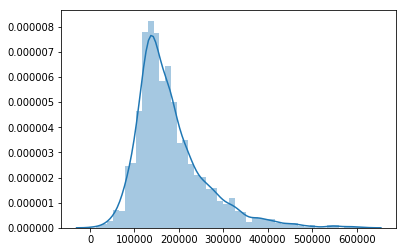

In [406]:
sns.distplot(y_train);

Cool. I'm going to start with a Lasso regression and work from there.

Turning y_train to a pandas array because lasso trows a warning when you don't do this

In [407]:
y_train_array = column_or_1d(y_train)

Creating the lasso model. Used logspace to get the alphas bcause that generates a large range of variables.

In [408]:
#l_alphas = np.logspace(-4, -.5, 30) #Alpha 0.31622776601683794
l_alphas = np.logspace(1.595,1.6,100 )
lasso_model = LassoCV(alphas=l_alphas, cv=5)
lasso_model = lasso_model.fit(X_train, y_train_array)

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

In [409]:
optimus_alpha = lasso_model.alpha_
optimus_alpha

39.810717055349734

Now to create a prediction

In [410]:
cleo = lasso_model.predict(X_test)

In [411]:
type(cleo)

numpy.ndarray

Got the predictions. Now to get into the correct format

In [412]:
df_cleo = pd.DataFrame({'Id': test.Id,'SalePrice':cleo})

In [413]:
df_cleo.to_csv('./Data/Final_Lasso10.csv',index=False)

Let's read the file and see if the format's correct.

In [414]:
df_test = pd.read_csv('./Data/Final_Lasso10.csv')

In [415]:
df_test.head()

,Id,SalePrice
0,2658,130262.898724
1,2718,158937.816199
2,2414,219552.009907
3,1989,112193.169186
4,625,177777.546058


In [416]:
r_alphas = np.logspace(-4, -.5, 30)
ridge_model = RidgeCV(alphas=r_alphas, cv=5)
ridge_model = ridge_model.fit(X_train, y_train_array)

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.466999e-21
  overwrite_a=True).T
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.046527e-21
  overwrite_a=True).T
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.987153e-21
  overwrite_a=True).T
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.616550e-2

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.826716e-20
  overwrite_a=True).T
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.432655e-20
  overwrite_a=True).T
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.752242e-20
  overwrite_a=True).T
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.379625e-2

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.525632e-19
  overwrite_a=True).T
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.298077e-19
  overwrite_a=True).T
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.324485e-19
  overwrite_a=True).T
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.952397e-1

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.617241e-18
  overwrite_a=True).T
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.741123e-18
  overwrite_a=True).T
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.055761e-18
  overwrite_a=True).T
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.388033e-1

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.244893e-17
  overwrite_a=True).T
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.862865e-18
  overwrite_a=True).T
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.047206e-17
  overwrite_a=True).T
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.644609e-1

In [42]:
optimus_alpha_r = ridge_model.alpha_
optimus_alpha_r

0.31622776601683794

Thats a bad alpha. Let's rerun with different variables.

In [43]:
r_alphas = np.logspace(-1, 1, 100)
ridge_model = RidgeCV(alphas=r_alphas, cv=5)
ridge_model = ridge_model.fit(X_train, y_train_array)

In [44]:
optimus_alpha_r = ridge_model.alpha_
optimus_alpha_r

10.0

Also a bad alpha. Again

In [417]:
r_alphas = np.logspace(1, 2, 100)
ridge_model = RidgeCV(alphas=r_alphas, cv=5)
ridge_model = ridge_model.fit(X_train, y_train_array)

In [418]:
optimus_alpha_r = ridge_model.alpha_
optimus_alpha_r

15.199110829529339

That's better. Lets see if we can get a better value

In [419]:
r_alphas = np.logspace(1.01, 1.07, 100)
ridge_model = RidgeCV(alphas=r_alphas, cv=5)
ridge_model = ridge_model.fit(X_train, y_train_array)

In [420]:
optimus_alpha_r = ridge_model.alpha_
optimus_alpha_r

11.748975549395297

Let's go with that. Make predictions and send it up

In [421]:
cleo = ridge_model.predict(X_test)

df_cleo = pd.DataFrame({'Id': test.Id,'SalePrice':cleo})

df_cleo.to_csv('./Data/Final_Ridge.csv',index=False)

df_test = pd.read_csv('./Data/Final_Ridge.csv')
df_test.head()

,Id,SalePrice
0,2658,128006.637253
1,2718,156159.402855
2,2414,224227.180586
3,1989,119326.789280
4,625,185130.639776


Not as good as Lasso. Let's try Elastic net now.

In [53]:
enet_alphas = np.logspace(-4, -.5, 30)
enet_ratio = 0.5
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)
enet_model = enet_model.fit(X_train, y_train_array)

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [54]:
optimus_alpha_e = enet_model.alpha_
optimus_alpha_e

0.011264816923358867

That's actually not bad. Let's try and improve it a bit.

In [55]:
enet_alphas = np.logspace(-2, -1.4, 100)
enet_ratio = 0.5
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)
enet_model = enet_model.fit(X_train, y_train_array)

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [107]:
optimus_alpha_e = enet_model.alpha_
optimus_alpha_e

NameError: name 'enet_model' is not defined

I'll take that. Let's get predictions and upload.

In [57]:
cleo = enet_model.predict(X_test)

df_cleo = pd.DataFrame({'Id': test.Id,'SalePrice':cleo})

df_cleo.to_csv('./Data/Final_ENet.csv',index=False)

df_test = pd.read_csv('./Data/Final_ENet.csv')
df_test.head()

,Id,SalePrice
0,2658,140253.993862
1,2718,151420.741431
2,2414,224546.114947
3,1989,119975.741127
4,625,183240.203447


Still not as good as Lasso. Let's make ENet closer to Lasso

In [58]:
enet_alphas = np.logspace(-1.4, -.1, 100)
enet_ratio = 0.9
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)
enet_model = enet_model.fit(X_train, y_train_array)

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [59]:
optimus_alpha_e = enet_model.alpha_
optimus_alpha_e

0.06458044155705082

In [60]:
cleo = enet_model.predict(X_test)

df_cleo = pd.DataFrame({'Id': test.Id,'SalePrice':cleo})

df_cleo.to_csv('./Data/Final_ENet_9.csv',index=False)

df_test = pd.read_csv('./Data/Final_ENet_9.csv')
df_test.head()

,Id,SalePrice
0,2658,140297.748174
1,2718,151442.924030
2,2414,224568.370027
3,1989,119930.066352
4,625,183276.399688


Not improving on Lasso. Let's try logistic

In [61]:
log_model = LogisticRegression()
log_model = log_model.fit(X_train,y_train)

In [62]:
cleo = log_model.predict(X_test)
df_cleo = pd.DataFrame({'Id': test.Id,'SalePrice':cleo})

df_cleo.to_csv('./Data/Final_Log.csv',index=False)

df_test = pd.read_csv('./Data/Final_Log.csv')
df_test.head()

,Id,SalePrice
0,2658,221000.0
1,2718,145000.0
2,2414,214900.0
3,1989,103000.0
4,625,135000.0


That was bad. I'll have to practise this one.

Let's run X_train through the standard scaler and use KFolds on the Lasso. Maybe that will help.

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
kf = KFold(n_splits=10,shuffle=True)

In [57]:
l_alphas = np.logspace(1.5,1.8,100)
lasso_model = LassoCV(alphas=l_alphas, cv=kf)
lasso_model = lasso_model.fit(X_train_scaled, y_train_array)

In [59]:
optimus_alpha = lasso_model.alpha_
optimus_alpha

63.09573444801933

That's not a good alpha. Let's try again with a different range

In [62]:
l_alphas = np.logspace(1.6,3,100)
lasso_model = LassoCV(alphas=l_alphas, cv=kf)
lasso_model = lasso_model.fit(X_train_scaled, y_train_array)

In [63]:
optimus_alpha = lasso_model.alpha_
optimus_alpha

698.9473207273486

That's not bad. Let's refine it.

In [71]:
l_alphas = np.logspace(1.595,1.6,100 )
lasso_model = LassoCV(alphas=l_alphas, cv=kf)
lasso_model = lasso_model.fit(X_train_scaled, y_train_array)

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

In [72]:
optimus_alpha = lasso_model.alpha_
optimus_alpha

39.80608764960582

OK. Let's run the numbers and send it out.

In [73]:
cleo = lasso_model.predict(X_test)

df_cleo = pd.DataFrame({'Id': test.Id,'SalePrice':cleo})

df_cleo.to_csv('./Data/Final_Lasso_std.csv',index=False)

df_test = pd.read_csv('./Data/Final_Lasso_std.csv')
df_test.head()

,Id,SalePrice
0,2658,1.137575e+08
1,2718,1.255760e+08
2,2414,1.510804e+08
3,1989,8.362614e+07
4,625,1.117001e+08


In [67]:
l_alphas = np.logspace(1.633,1.644,100)
lasso_model = LassoCV(alphas=l_alphas, cv=kf)
lasso_model = lasso_model.fit(X_train, y_train_array)

In [68]:
optimus_alpha = lasso_model.alpha_
optimus_alpha

42.95364267648873

In [85]:
cleo = lasso_model.predict(X_test)

df_cleo = pd.DataFrame({'Id': test.Id,'SalePrice':cleo})

df_cleo.to_csv('./Data/Final_Lasso6.csv',index=False)

df_test = pd.read_csv('./Data/Final_Lasso6.csv')
df_test.head()

,Id,SalePrice
0,2658,144883.121400
1,2718,153728.115354
2,2414,219791.558650
3,1989,113314.588285
4,625,179012.040289


Let's do a Gamma 

In [87]:
import statsmodels.api as sm

/home/steven/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [92]:
X_train_const = sm.add_constant(X_train)

In [95]:
X_test_const = sm.add_constant(X_test)

In [93]:
results = sm.GLM(y_train,
                 X_train_const,
                 family = sm.families.Gamma()).fit()

/home/steven/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:302: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


In [96]:
cleo = results.predict(X_test_const)

In [97]:
df_cleo = pd.DataFrame({'Id': test.Id,'SalePrice':cleo})

df_cleo.to_csv('./Data/Final_Gamma.csv',index=False)

df_test = pd.read_csv('./Data/Final_Gamma.csv')
df_test.head()

,Id,SalePrice
0,2658,75207.619245
1,2718,150951.388009
2,2414,215900.537137
3,1989,98802.183501
4,625,169895.676835
